# Projenin başlığı

#### Ali Baran Tasdemir - Ahmet Kasim Toptas

Otizm Spektrum Bozukluğu (OSB), bir kişinin başkalarıyla sosyalleşmesini, sosyal etkileşim ve iletişimde sorunlara neden olan karmaşık bir nörogelişimsel bozukluktur. Bozukluk ayrıca bazı sınırlı ve tekrarlayan davranış kalıplarını da içerir. OSB, herkesin bildiği çok çeşitli isimler içermektedir. Örneğin, en bilinenlerden birinin "Asperger sendromu"' nun OSB'nin hafif ucunda olduğu düşünülmektedir.

OSB'nin tedavisi yoktur. Ancak erken ve yoğun tedavi, birçok yetişkin ve çocuğun hayatında büyük bir fark yaratabilir. Erken teşhis önemli bir role sahiptir. Erken teşhisi konan ve davranışlarını kontrol etmek için özel eğitim alan çocukların neredeyse yarısı iyi bir gelişimsel ilerleme kaydeder.
Ana sorun, otizmi teşhis etmek için tıbbi test olmamasıdır. Teşhis görüşmeler, gözlemler, gelişimsel testler ve hastanın geçmişini analiz eden uzman doktorlar tarafından yapılır. Dolayısıyla otizmi teşhis etmek zaman alıcı ve pahalı bir süreçtir. Ayrıca, teşhis doktorların kabiliyeti ile sınırlıdır.
Görüşme sürecinde en çok kullanılan teknik "AQ-10" testidir. AQ-10 testinin farklı yaş grupları için 10 sorusu vardır. Bu test OSB hastaları için bazı basmakalıp davranışları ve semptomları tespit etmeye çalışır.


## İçerik

[Problem](#problem)   
[Verinin Anlaşılması](#data_understanding)   
[Verilerin Hazırlanması](#data_preparation)   
[Modelleme](#modeling)   
[Değerlendirme](#evaluation)   
[Referanslar](#references)   


In [158]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Problem <a class="anchor" id="problem"></a>

OSB tanısı ile ilgili temel sorunlar zaman ve maliyettir. Uzman doktor hastaların geçmişini incelemeye çalışır ve hastaya bir tür test uygular. Ve bir hastayı teşhis etme süresi zaman alıcıdır.

Erken teşhis edilen hastaların dünyanın geri kalanını ile sosyal ilişkiler vb. açısından adapte olma olasılığı daha yüksektir. Ayrıca faz tanısı için uzman bir doktora ihtiyaç vardır. Bilgisayarlar ve yapay zeka döneminde, bu problemi bir makine öğrenimi ve veri bilimi problemi olarak görüyoruz. Ve kendimize "Bir hasta için OSB tanısı koyabilir miyiz?" diye soruyoruz.


In [159]:
df_child = pd.read_csv("Autism-Child-Data.csv")
df_child["Age_group"] = "Child"

df_adolescent = pd.read_csv("Autism-Adolescent-Data.csv")
df_adolescent["Age_group"] = "Adolescent"

df_adult = pd.read_csv("Autism-Adult-Data.csv")
df_adult["Age_group"] = "Adult"

In [160]:
t_r, c = (df_child.shape[0] + df_adolescent.shape[0] + df_adult.shape[0]), (df_child.shape[1])
print("Cocuk Verisi: {} satır, {} sütun.".format(df_child.shape[0], df_child.shape[1]))
print("Genc Verisi: {} satır, {} sütun.".format(df_adolescent.shape[0], df_adolescent.shape[1]))
print("Yetiskin Verisi: {} satır, {} sütun.".format(df_adult.shape[0], df_adult.shape[1]))
print("-"*30)
print("Total: {} satır, {} sütun.".format(t_r, c))

Cocuk Verisi: 292 satır, 22 sütun.
Genc Verisi: 104 satır, 22 sütun.
Yetiskin Verisi: 704 satır, 22 sütun.
------------------------------
Total: 1100 satır, 22 sütun.


In [161]:
df_all = pd.concat([df_child, df_adolescent, df_adult], axis=0)
if (t_r == df_all.shape[0]) and (c == df_all.shape[1]):
    print("Success")
else:
    print("Something wrong!")

Success


## Verinin Anlaşılması<a class="anchor" id="data_understanding"></a>

OSB tanısı çoğunlukla hasta ile görüşülerek yapılır. Ve bu işlem için en çok kullanılan teknik "Otizm-Spektrum Bölümü (AQ)" adlı bir testtir. "AQ-10" testi, orijinal AQ-Testinin indirgenmiş formudur. "AQ-10" testinin arkasındaki ana sezgi, görüşmelerden önce hasta için bir temel oluşturmak üzere kullanılmaktır.

Görüşme sırasında 10 soru sorulmuştur. Veri kümesinde A1 ila A10 olarak sembolize edilir. Her yaş grubu için farklı sorular vardır. Testlerin içeriğini göstermek için yalnızca yetişkinlere yönelik test için yazacağız.


---

** Soru 1. ** Diğer insanların duymadığı küçük sesleri duyuyorum.

** Soru 2. ** Küçük detaylardan ziyade genellikle resmin tamamına daha fazla konsantre olurum

** Soru 3. ** Aynı anda birden fazla şey yapmayı kolay buluyorum

** Soru 4. ** Bir kesinti olursa, çok hızlı yaptığım şeye geri dönebilirim

** Soru 5. ** Biri benimle konuşurken mecaz anlamları kolayca anlayabiliyorum.

** Soru 6. ** Beni dinleyen birinin ne kadar sıkılıp sıkılmadığını doğru bir biçimde anlayabiliyorum.

** Soru 7. ** Bir hikaye okurken karakterlerin niyetlerini çözmekte zorlanıyorum

** Soru 8. ** Herhangi bir nesnenin kategorileri hakkında bilgi toplamayı seviyorum (örneğin araba türleri, kuş türleri, tren türleri, bitki türleri vb.)

** Soru 9. ** Birisinin sadece yüzüne bakarak ne düşündüğünü veya hissettiğini kolayca bulabiliyorum.

** Soru 10. ** İnsanların niyetlerini çözmekte zorlanıyorum


Puanlama:

Her soru için sadece 1 puan puanlanabilir. 1, 7, 8 ve 10 sorularının her birinde Kesinlikle veya Hafif Katılıyorum için 1 puan kazanın 2, 3, 4, 5, 6 ve 9 maddelerinin her birinde Kesinlikle veya Hafif Katılmıyorum için 1 puan alın. 6 puan veya üzeri için, uzman bir teşhis değerlendirmesi için onları yönlendirmeyi düşünün.


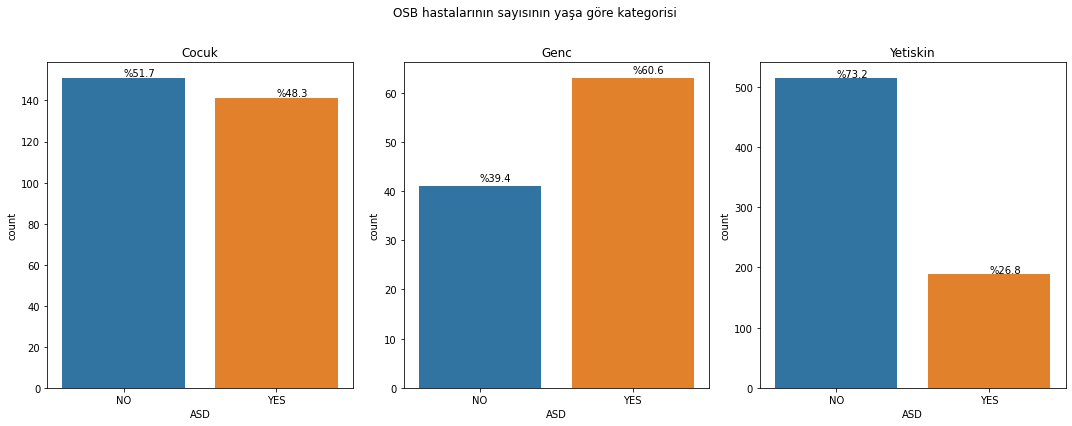

In [162]:
plt.figure(figsize=(15,6))
plt.subplot(131)
ax1 = sns.countplot(df_child["ASD"])

total = len(df_child["ASD"])
for p in ax1.patches:
    ax1.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

plt.title("Cocuk")

plt.subplot(132)
ax2 = sns.countplot(df_adolescent["ASD"])

total = len(df_adolescent["ASD"])
for p in ax2.patches:
    ax2.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

plt.title("Genc")


plt.subplot(133)
ax3 = sns.countplot(df_adult["ASD"])

total = len(df_adult["ASD"])
for p in ax3.patches:
    ax3.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

plt.title("Yetiskin")


plt.suptitle("OSB hastalarının sayısının yaşa göre kategorisi ")
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Veri kümesinde, daha genç yaş gruplarında daha fazla OSD tanısı konmuş hasta vardır. Diğer taraftan, erişkin örneklem grubunda verilerin çoğunluğu "OSB Değil" olarak teşhis edilmektedir.


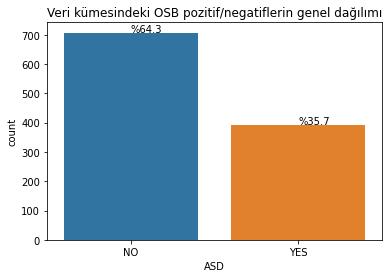

In [163]:
ax = sns.countplot(df_all["ASD"])
plt.title("Veri kümesindeki OSB pozitif/negatiflerin genel dağılımı")
total = len(df_all["ASD"])
for p in ax.patches:
    ax.annotate('%{:.1f}'.format((p.get_height()/total)*100), 
                 (p.get_x()+p.get_width()/2, p.get_height()+1))

Yetişkin veri kümesinin yaklaşık 700 örneği vardır. Ancak, çocuk ve ergen veri kümelerinin toplamının yaklaşık 400 örneği vardır. Toplam dağılıma baktığımızda yetişkin verilerinin genel sonuçlar üzerinde daha fazla etkisi olduğunu görüyoruz.


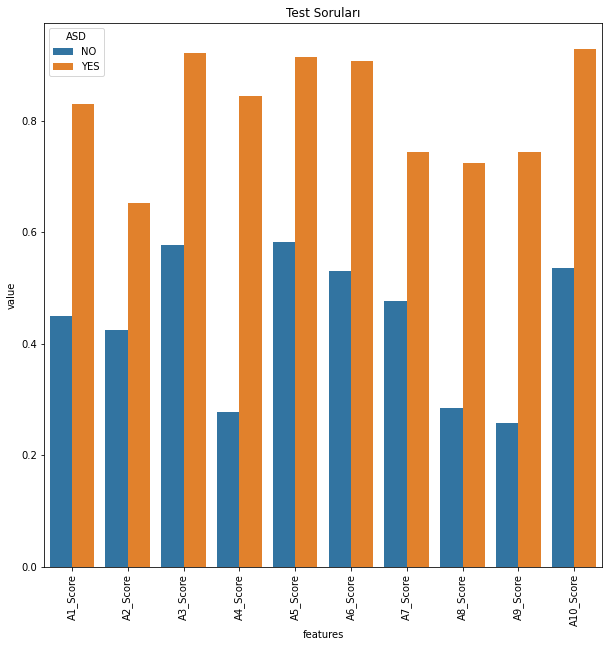

In [164]:
data = pd.melt(pd.concat([df_child["ASD"],df_child.iloc[:,:10]],axis=1),id_vars="ASD",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,10))
sns.barplot(x="features", y="value", hue="ASD", data=data, ci=None)
plt.xticks(rotation=90)
plt.title("Test Soruları")
plt.show()

Veri kümesinde 10 farklı soru vardır. Ve OSB ve OSB'li olmayanların sorularının cevaplarınının oranlarını grafik olarak görüyoruz.Mesela 3.soruda OSB olmayanlar daha çok negatif cevap verirken,OSB olanların neredeyse hepsi pozitif cevap vermiş.

Örneğin, 3., 5. ve 10. sorular için ortalama ceavap 0.5'un üzerinde. Bu demektir ki OSB'li olmayanlar bu soruları daha çok pozitif biçimde cevaplamış. Diğer durumda ise,OSB'li olanların neredeyse hepsinin 3., 5., 6. ve 10. sorularda pozitif cevapladığını görüyoruz.

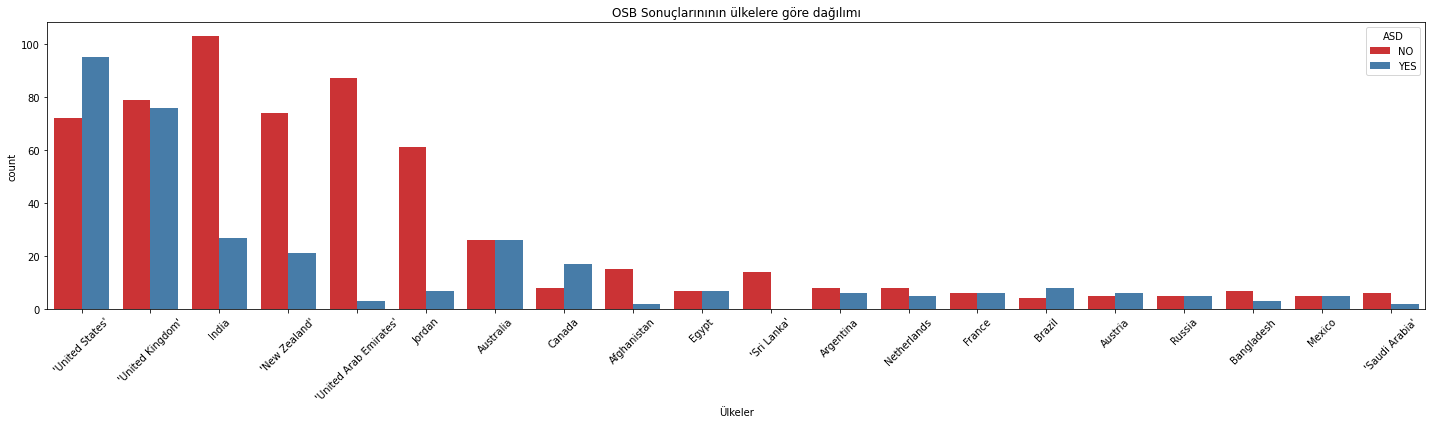

In [165]:
plt.figure(figsize=(20,6))
sns.countplot(x='contry_of_res', data=df_all, order= df_all['contry_of_res'].value_counts().index[:20], hue='ASD',palette='Set1')
# sns.countplot(x='contry_of_res', data=df_all, hue='gender',palette='viridis')
plt.xticks(rotation=45)
plt.title('OSB Sonuçlarınının ülkelere göre dağılımı')
plt.xlabel('Ülkeler')
plt.tight_layout()

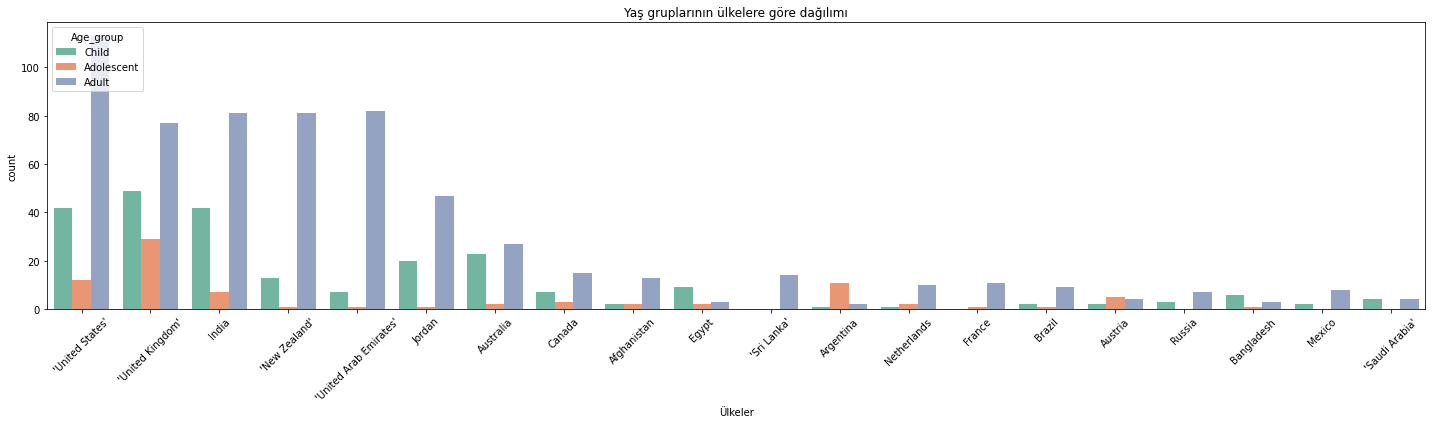

In [166]:
plt.figure(figsize=(20,6))
sns.countplot(x='contry_of_res', data=df_all, order= df_all['contry_of_res'].value_counts().index[:20], hue='Age_group',palette='Set2')
plt.xticks(rotation=45)
plt.title('Yaş gruplarının ülkelere göre dağılımı')
plt.xlabel('Ülkeler')
plt.tight_layout()

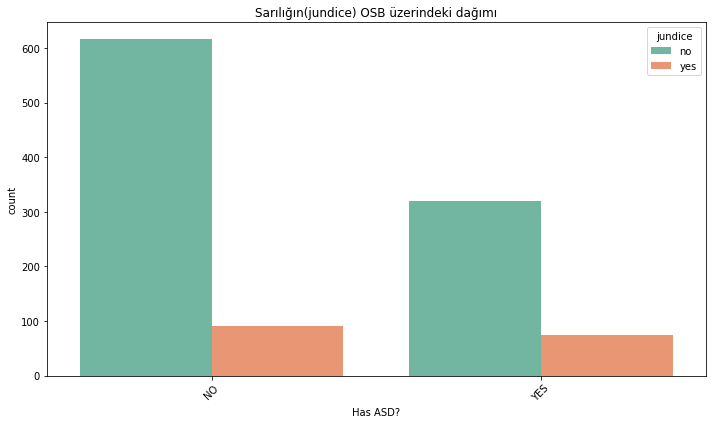

In [167]:
plt.figure(figsize=(10,6))
sns.countplot(x='ASD', data=df_all, hue='jundice',palette='Set2')
plt.xticks(rotation=45)
plt.title('Sarılığın(jundice) OSB üzerindeki dağımı')
plt.xlabel('Has ASD?')
plt.tight_layout()

Grafikte gördüğümüz gibi, OSB pozitif ve negatif üzerindeki sarılık(jundice) dağılımı neredeyse eşittir. Verilere bakarak, sarılığın ASD'nin kararı üzerinde önemli bir etkiye sahip görünmemektedir.

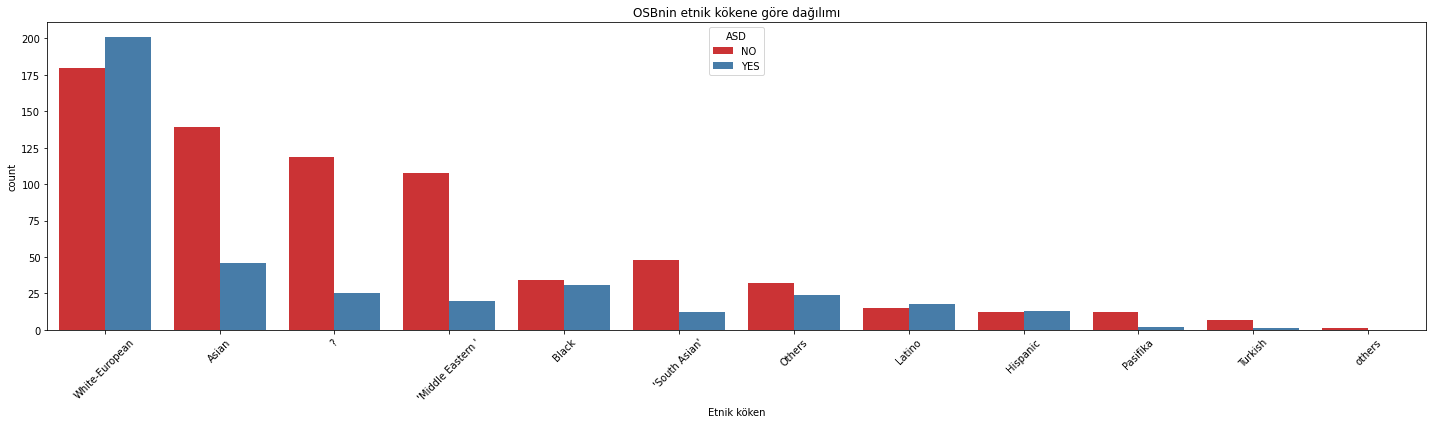

In [168]:
plt.figure(figsize=(20,6))
sns.countplot(x='ethnicity', data=df_all, order= df_all['ethnicity'].value_counts().index[:20], hue='ASD',palette='Set1')
# sns.countplot(x='contry_of_res', data=df_all, hue='gender',palette='viridis')
plt.xticks(rotation=45)
plt.title('OSBnin etnik kökene göre dağılımı')
plt.xlabel('Etnik köken')
plt.tight_layout()

Etnik kökenin sonuçlar üzerinde görünür bir etkisi yok gibi görünüyor. Ancak teste girenlerin çoğu Beyaz Avrupalı insanlardır.

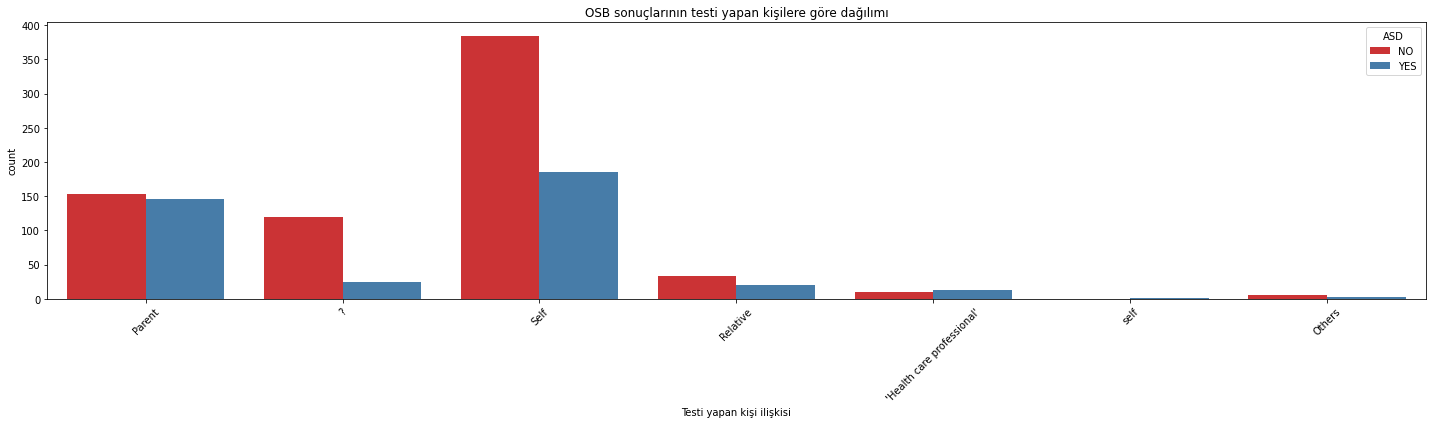

In [169]:
plt.figure(figsize=(20,6))
sns.countplot(x='relation', data=df_all, hue='ASD',palette='Set1')
# sns.countplot(x='contry_of_res', data=df_all, hue='gender',palette='viridis')
plt.xticks(rotation=45)
plt.title('OSB sonuçlarının testi yapan kişilere göre dağılımı')
plt.xlabel('Testi yapan kişi ilişkisi')
plt.tight_layout()

Test sonuçları, cevaplanan kişilerin ve cevaplanan kişilerin sorularının farkı ile yanılmaya sebep olabilir.

## Verilerin Hazırlanması <a class="anchor" id="data_preparation"></a>

Veri setimiz için Veri Hazırlama'nın bazı adımları vardır. İlk olarak, null veya eksik değerleri kontrol edip işleyeceğiz. Bundan sonra, kategorik değerleri ve veri türü sorunlarını (veri kümesinde string olarak temsil edilen tamsayılar) ele alacağız ve son olarak özellikleri inceleyeceğiz ve bunları daha etkili kullanmak için bazı stratejiler seçeceğiz.


In [170]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         1100 non-null   int64 
 1   A2_Score         1100 non-null   int64 
 2   A3_Score         1100 non-null   int64 
 3   A4_Score         1100 non-null   int64 
 4   A5_Score         1100 non-null   int64 
 5   A6_Score         1100 non-null   int64 
 6   A7_Score         1100 non-null   int64 
 7   A8_Score         1100 non-null   int64 
 8   A9_Score         1100 non-null   int64 
 9   A10_Score        1100 non-null   int64 
 10  age              1100 non-null   object
 11  gender           1100 non-null   object
 12  ethnicity        1100 non-null   object
 13  jundice          1100 non-null   object
 14  austim           1100 non-null   object
 15  contry_of_res    1100 non-null   object
 16  used_app_before  1100 non-null   object
 17  result           1100 non-null   i

#### Eksik Değerler

Veri kümesinin açıklamasında, null değerlerin '?' ile sembolize edildiği yazılmıştır. Bu yüzden pandasta daha kolay çalışabilmek için numpy ile bu '?' değerini null ile değiştireceğiz.

In [171]:
df_all.replace("?",np.nan,inplace=True)

In [172]:
df_all.shape[0] - (df_all.shape[0] - df_all.isnull().sum())

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  6
gender               0
ethnicity          144
jundice              0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation           144
ASD                  0
Age_group            0
dtype: int64

In [173]:
df_all.shape[0] - (df_all.shape[0] - df_all.isnull().sum())

A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  6
gender               0
ethnicity          144
jundice              0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation           144
ASD                  0
Age_group            0
dtype: int64

In [174]:
(df_all.shape[0] - (df_all.shape[0] - df_all.isnull().sum())) /df_all.shape[0] * 100

A1_Score            0.000000
A2_Score            0.000000
A3_Score            0.000000
A4_Score            0.000000
A5_Score            0.000000
A6_Score            0.000000
A7_Score            0.000000
A8_Score            0.000000
A9_Score            0.000000
A10_Score           0.000000
age                 0.545455
gender              0.000000
ethnicity          13.090909
jundice             0.000000
austim              0.000000
contry_of_res       0.000000
used_app_before     0.000000
result              0.000000
age_desc            0.000000
relation           13.090909
ASD                 0.000000
Age_group           0.000000
dtype: float64

Veri kümesinde 3 özellik için boş değerlere sahibiz. Bunlar yaş, etnik köken ve ilişkidir. Sadece 6 eksik yaş verisi var. Ancak etnik köken ve ilişki verisi eksikliği sayısı yüksektir (144). Bu sayı, örneklerin %13'ünün etnik köken ve ilişki için bir değeri olmadığı anlamına gelir.

##### Yaş

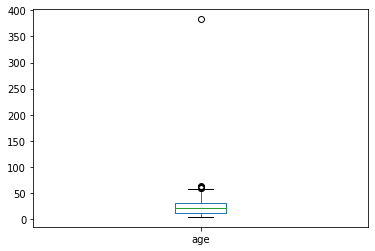

In [175]:
df_all["age"].apply(lambda x:float(x)).plot(kind='box')
plt.show()

Eksik olan 6 değeri örneklerin yaş grubu için ortalama ile dolduracağız. Ancak box-plot grafiğinde gördüğünüz gibi aşırı bir değer var. Bu değeri de aynı stratejiyle değiştirmeliyiz.

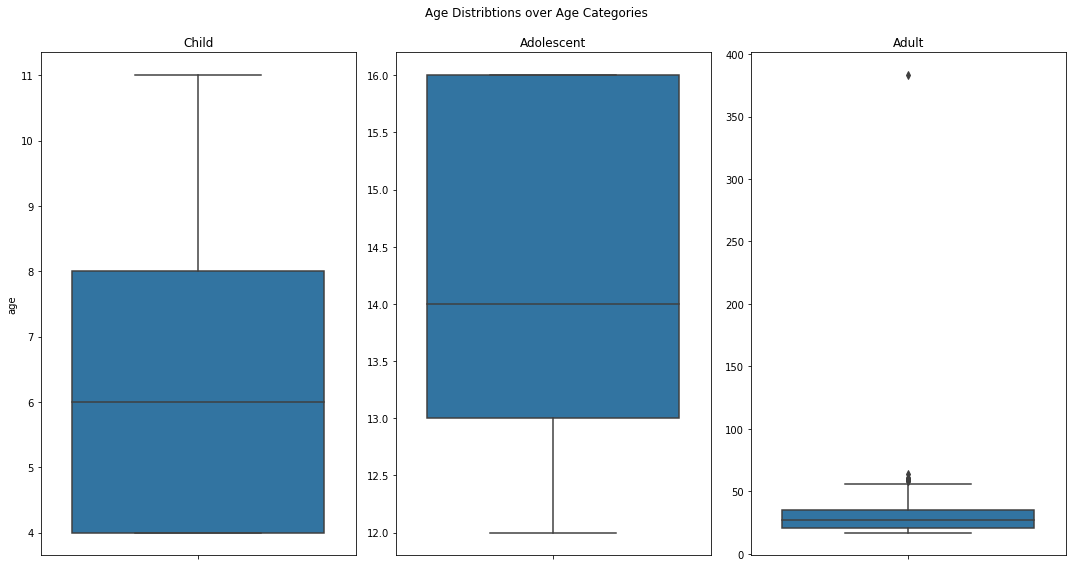

In [176]:
plt.figure(figsize=(15,8))

plt.subplot(131)
sns.boxplot(y=df_all[df_all["Age_group"] == "Child"]["age"].apply(lambda x:float(x)))
plt.title("Child")

plt.subplot(132)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adolescent"]["age"].apply(lambda x:float(x)))
plt.title("Adolescent")
plt.ylabel("")

plt.subplot(133)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adult"]["age"].apply(lambda x:float(x)))
plt.ylabel("")
plt.title("Adult")

plt.suptitle("Age Distribtions over Age Categories")
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [177]:
# Parse age data to float.
df_all["age"] = df_all["age"].apply(lambda x:float(x))

Aşırı değer, yetişkin veri kümesinden bir örnektir, bu yüzden bu değeri yetişkin veri kümesinin medyan değeri ile dolduracağız.

In [178]:
avg_child = df_all[df_all["Age_group"] == "Child"]["age"].median()
avg_adolescent = df_all[df_all["Age_group"] == "Adolescent"]["age"].median()
avg_adult =  df_all[df_all["Age_group"] == "Adult"]["age"].median()

In [179]:
# Extreme val removed.
df_all.age.replace(df_all.age.max(), avg_adult, inplace=True)

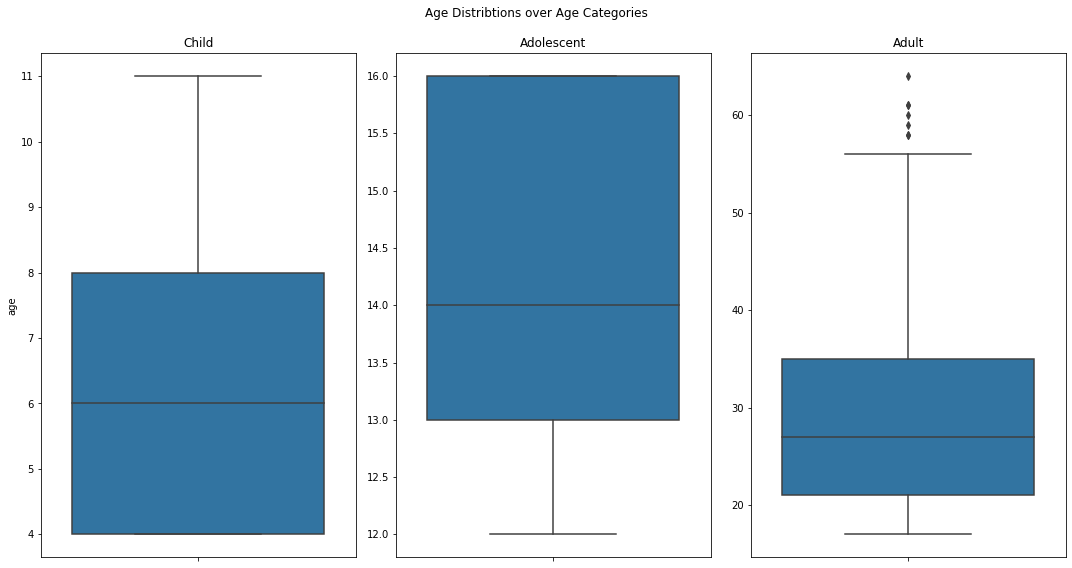

In [180]:
plt.figure(figsize=(15,8))

plt.subplot(131)
sns.boxplot(y=df_all[df_all["Age_group"] == "Child"]["age"])
plt.title("Child")

plt.subplot(132)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adolescent"]["age"])
plt.title("Adolescent")
plt.ylabel("")

plt.subplot(133)
sns.boxplot(y=df_all[df_all["Age_group"] == "Adult"]["age"])
plt.ylabel("")
plt.title("Adult")

plt.suptitle("Age Distribtions over Age Categories")
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

Bir ekstrem değeri işledikten sonra şimdi eksik değerleri medyanlarla değiştireceğiz.

In [181]:
# Now we will replace the missing values with corresponding median values.
df_all.loc[((df_all["age"].isna()) & (df_all["Age_group"] == "Adult")), "age"] = avg_adult
df_all.loc[((df_all["age"].isna()) & (df_all["Age_group"] == "Adolescent")), "age"] = avg_adolescent
df_all.loc[((df_all["age"].isna()) & (df_all["Age_group"] == "Child")), "age"] = avg_child

In [182]:
df_all.age.isna().value_counts()

False    1100
Name: age, dtype: int64

##### Ethnicity

Böyle bir test için etnik köken bilgisinin yararlı olacağını düşünmüyoruz. Ancak sonuçlar üzerindeki etkileri daha sonraki aşamalarda göreceğiz. Eksik veriler %13'tür. Verilerin en büyük çoğunluğunun Beyaz Avrupalılar olduğunu biliyoruz. Böylece tüm eksik alanları Beyaz Avrupalı olarak doldurabiliriz.

In [183]:
print(df_all.ethnicity.value_counts())
df_all.loc[(df_all["ethnicity"].isna()), "ethnicity"] = "White-European"
df_all.loc[df_all["ethnicity"] == "others", "ethnicity"] = "Others"
df_all.ethnicity.value_counts()


White-European       381
Asian                185
'Middle Eastern '    128
Black                 65
'South Asian'         60
Others                56
Latino                33
Hispanic              25
Pasifika              14
Turkish                8
others                 1
Name: ethnicity, dtype: int64


White-European       525
Asian                185
'Middle Eastern '    128
Black                 65
'South Asian'         60
Others                57
Latino                33
Hispanic              25
Pasifika              14
Turkish                8
Name: ethnicity, dtype: int64

Tüm eksik değerleri çoğunluk ile değiştirdik. Ayrıca bir biçim uyumsuzluğunu da değiştirdik. "Others" etnik kökenine sahip 56 kişi fakat 1 "others" etnik kökenine sahip insan vardır. Bu yüzden iki değeri birleştiriyoruz.

##### Relation

In [184]:
df_all.relation.value_counts()


Self                          571
Parent                        300
Relative                       53
'Health care professional'     23
Others                          8
self                            1
Name: relation, dtype: int64

"Relation" sütununda 144 (%13) eksik veri var. Bu yüzden bunları "Others" ile değiştireceğiz. Ayrıca 1 "self" ve 570 "Self" değeri vardır. Bu iki değeri de birleştireceğiz.

In [185]:
df_all.loc[(df_all["relation"].isna()), "relation"] = "Others"
df_all.loc[df_all["relation"] == "self", "relation"] = "Self"
df_all.relation.value_counts()

Self                          572
Parent                        300
Others                        152
Relative                       53
'Health care professional'     23
Name: relation, dtype: int64

In [186]:
df_all.shape[0] - (df_all.shape[0] - df_all.isnull().sum())

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
Age_group          0
dtype: int64

Bütün bu adımlardan sonra eksik değerleri hallettik.

#### Sütun(Feature) formatlama

In [187]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer

In [188]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         1100 non-null   int64  
 1   A2_Score         1100 non-null   int64  
 2   A3_Score         1100 non-null   int64  
 3   A4_Score         1100 non-null   int64  
 4   A5_Score         1100 non-null   int64  
 5   A6_Score         1100 non-null   int64  
 6   A7_Score         1100 non-null   int64  
 7   A8_Score         1100 non-null   int64  
 8   A9_Score         1100 non-null   int64  
 9   A10_Score        1100 non-null   int64  
 10  age              1100 non-null   float64
 11  gender           1100 non-null   object 
 12  ethnicity        1100 non-null   object 
 13  jundice          1100 non-null   object 
 14  austim           1100 non-null   object 
 15  contry_of_res    1100 non-null   object 
 16  used_app_before  1100 non-null   object 
 17  result         

"gender", "ethnicity", "jundice", "austim", "country_of_res", "used_app_before", "age_desc", "relation", "asd" ve "Age_group" sütunları kategorik sütunlarımız. Bu sütunları daha sonraki modellerde kullanmak için onları sayılarla göstermeliyiz.

In [189]:
# 0-1 binarizers
df_all.jundice = df_all.jundice.apply(lambda x: 0 if x == 'no' else 1)
df_all.austim = df_all.austim.apply(lambda x: 0 if x == 'no' else 1)
df_all.ASD = df_all.ASD.apply(lambda x: 0 if x == 'NO' else 1)
df_all.gender = df_all.gender.apply(lambda x: 0 if x == 'm' else 1)

Şimdi birkaç sütün eksilteceğiz.

"result" sütununda A1_score ile A10_score arasındaki genel sonuç bulunur. Bu durum, bu özelliği gereksiz kılar.

"age_desc" sütununun kullanıcı hakkında 18 yaşından büyük olup olmadığı bilgisi vardır. Bir predictor için bu bilgiye ihtiyacımız yok.

"used_app_before" sütununda, testin sonuçlarını toplamak için kullanılan uygulama hakkında bilgiler bulunur. Yani bu sütunla da ilgilenmiyoruz.

In [190]:
df_all.drop(['result', 'age_desc', 'used_app_before'], axis=1, inplace=True)

In [191]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 703
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A1_Score       1100 non-null   int64  
 1   A2_Score       1100 non-null   int64  
 2   A3_Score       1100 non-null   int64  
 3   A4_Score       1100 non-null   int64  
 4   A5_Score       1100 non-null   int64  
 5   A6_Score       1100 non-null   int64  
 6   A7_Score       1100 non-null   int64  
 7   A8_Score       1100 non-null   int64  
 8   A9_Score       1100 non-null   int64  
 9   A10_Score      1100 non-null   int64  
 10  age            1100 non-null   float64
 11  gender         1100 non-null   int64  
 12  ethnicity      1100 non-null   object 
 13  jundice        1100 non-null   int64  
 14  austim         1100 non-null   int64  
 15  contry_of_res  1100 non-null   object 
 16  relation       1100 non-null   object 
 17  ASD            1100 non-null   int64  
 18  Age_group

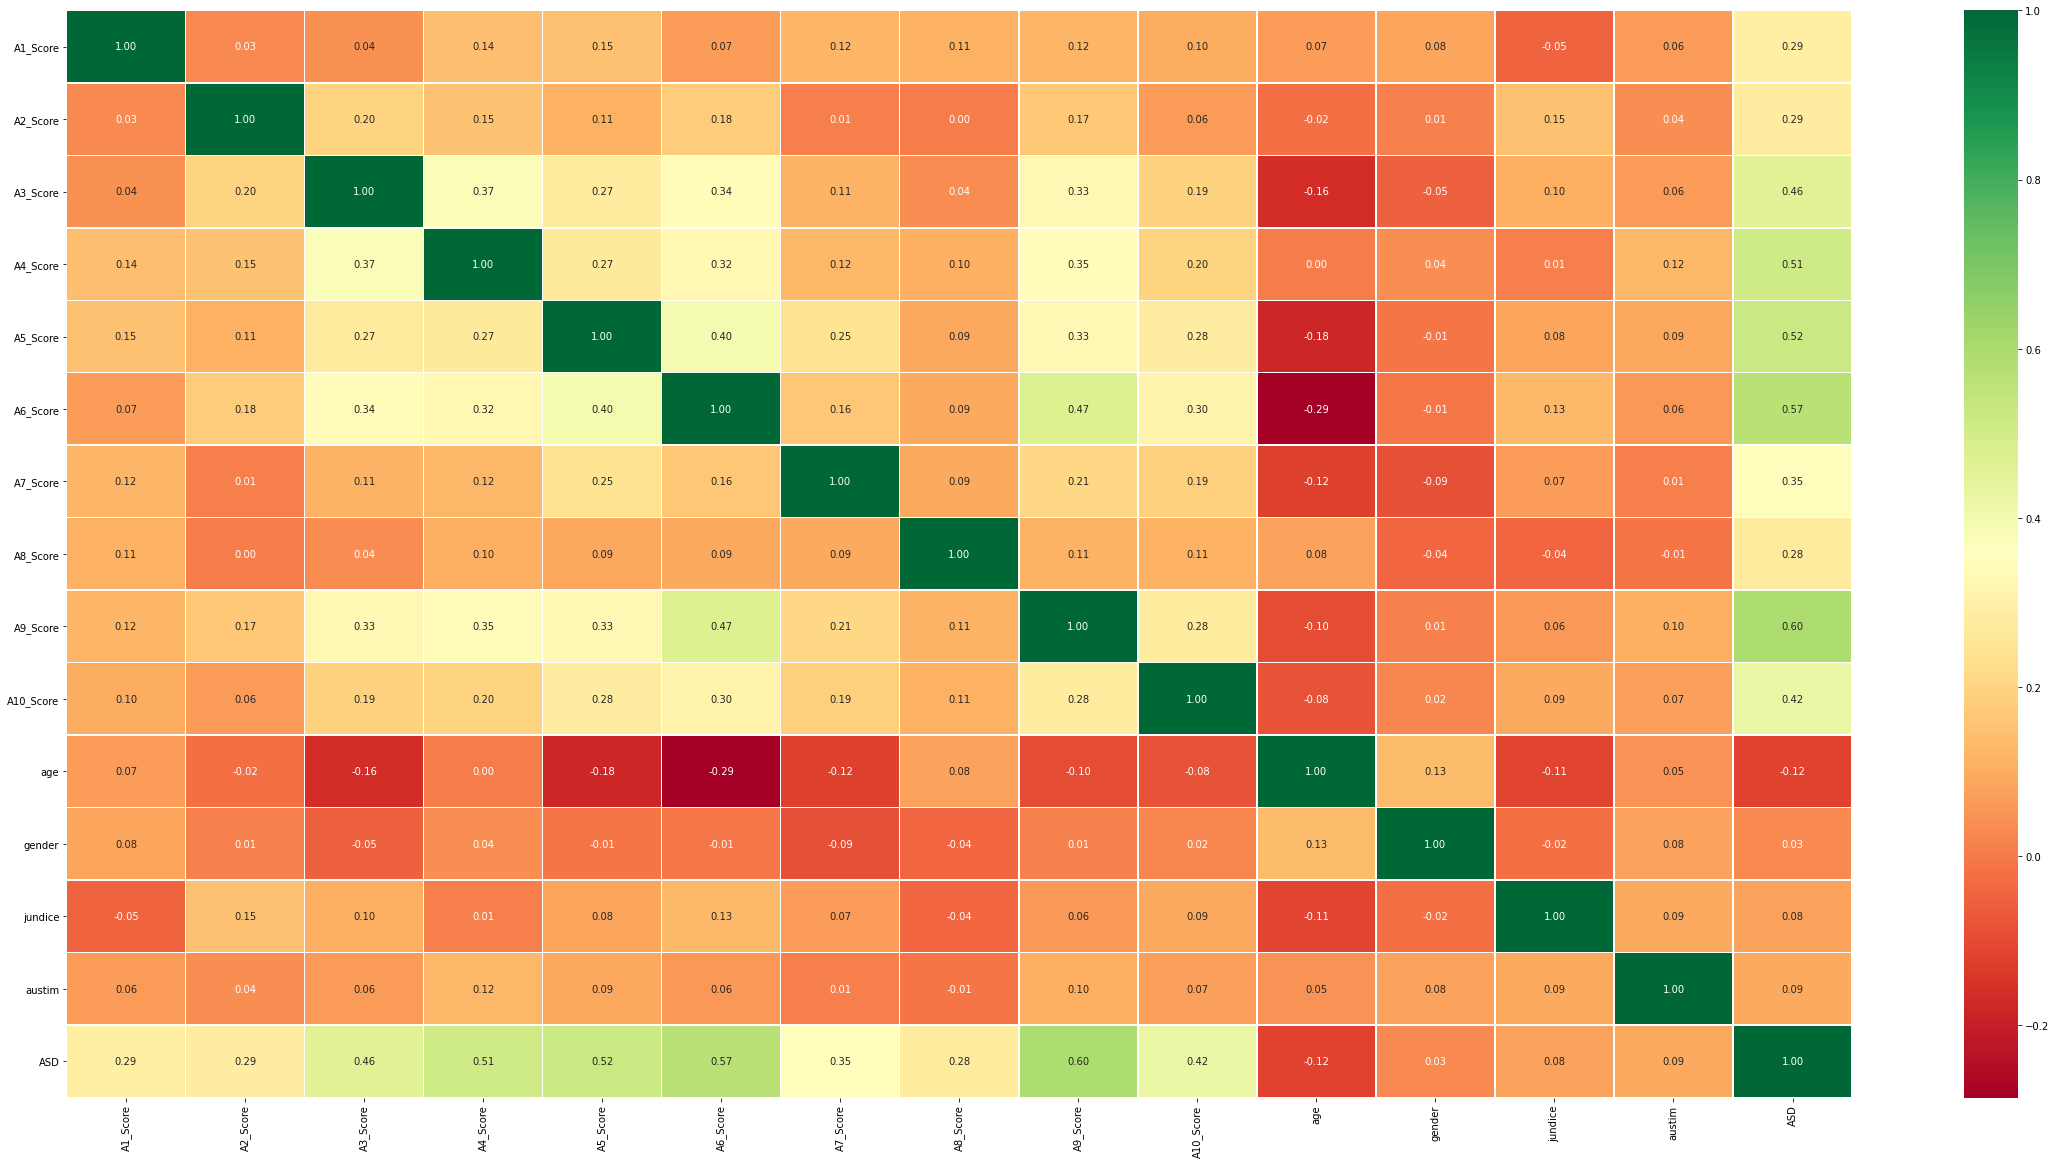

In [192]:
corr = df_all.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

Korelasyon matrisinde eleme gerektiren güçlü bir pozitif veya negatif korelasyon yoktur. Bu nedenle özelliklerimiz birbirine güçlü bir şekilde bağlı değildir. Bu, özellik işleme aşamamız için iyi bir sonuçtur. Sonuç olarak, herhangi bir sonucu silmemiz gerekmez.

ASD sütunu hedef sütundur. Diğer özelliklerin bu sütunla nasıl ilişkili olduğunu görebilir ve sınıflandırma modelindeki önemini tahmin edebiliriz. Örneğin korelasyon haritasında sorular hedefle güçlü pozitif korelasyona sahiptir. Ayrıca, jundice, gender ve age sütunlarının güçlü bir şekilde ilişkili olmadığını görebiliriz. Veri ilişkilerinde bu ilişkileri dağılımlara bakarak gördük.

## Modelleme <a class="anchor" id="modeling"></a>

Her şeyden önce, verileri sınıflandırma için hazırlamak zorundayız.

In [193]:
df_all.ethnicity = df_all.ethnicity.str.lower()
df_all.ethnicity = df_all.ethnicity.str.replace("'", "")
df_all.ethnicity = df_all.ethnicity.str.strip()
ethnics = pd.get_dummies(df_all['ethnicity'],drop_first=True)

df_all.contry_of_res = df_all.contry_of_res.str.lower()
df_all.contry_of_res = df_all.contry_of_res.str.replace("'", "")
df_all.contry_of_res = df_all.contry_of_res.str.strip()
res_country = pd.get_dummies(df_all['contry_of_res'],drop_first=True)

df_all.relation = df_all.relation.str.lower()
df_all.relation = df_all.relation.str.replace("'", "")
df_all.relation = df_all.relation.str.strip()
rel_dummy = pd.get_dummies(df_all['relation'],drop_first=True)

In [194]:
df_model = df_all.copy()
df_model.drop(["ethnicity", "contry_of_res", "relation", "Age_group"], axis=1, inplace=True)
df_model = pd.concat([df_model, ethnics, res_country, rel_dummy], axis=1)

In [195]:
df_model.shape

(1100, 116)

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def split_data(X, y, test_size=0.2, random_state=0, normalize=False):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=normalize)

    if normalize:
        scaler = MinMaxScaler()
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [197]:
X= df_model.drop(columns=["ASD"])
y= df_model.loc[:,"ASD"]

X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, 
                                              random_state=9, normalize=True)

Kategorik değerler için tamsayı değerleri kullandık ve verilerimizi %20 test - %80 training  oranıyla ayırdık.

#### Model Seçimi

Random Forest Trees algoritmasını bu ödev için kullanacağız.

***Random Forest Trees*** algoritması hem sınıflandırma hem de regresyon problemleri için bir grup öğrenme yöntemidir. Verileri ayırır ve birden çok karar ağacı oluşturur. Sonuç, bu karar ağaçlarının birleşimidir.

Random Forest Trees seçmemizin nedeni, bir grup yöntemidir. Bu nedenle, aşırı sığdırma(overfitting) problemiyle yüzleşme olasılığı daha düşüktür. Ayrıca, Random Forest Trees yüksek boyutlu verileri işleyebilir.

In [198]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,f1_score,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [199]:
def doPrediction(Xin,yin):
    Xin, Xtest, yin, ytest = train_test_split(Xin, yin, test_size=0.20, random_state=9)
    nfolds = 5
    cv = StratifiedKFold(n_splits=nfolds, shuffle=True)

    clasf = RandomForestClassifier()
    cvclasf = GridSearchCV(clasf, param_grid = {
        'n_estimators' : [5,10,25,50,100],
        'criterion' : ['entropy','gini'],
        'max_features' : [0.2,'sqrt',1., None, 'auto'],
        'class_weight' : ['balanced', 'balanced_subsample', None], 
        }, verbose=0,refit=True,
        cv=cv,
        scoring='f1_weighted',
    n_jobs=4)
    
    # Fit GridSearch
    cvclasf.fit(Xin,yin)
    # Take the best classifier
    bclasf = cvclasf.best_estimator_
    # Print out best parameters chosen for given model.
    print("%d-fold best CV params: %s" % (nfolds,cvclasf.best_params_))
    
    return bclasf


In [200]:
def testModel(X_train, y_train):
    
    clasf = doPrediction(X_train, y_train)

    training_score = clasf.score(X_train, y_train)
    print('Random Forest sınıflandırılmasında training setinin accuracysi: {:.4f}'.format(training_score))
    print(classification_report(y_train, clasf.predict(X_train)))

    return clasf, training_score

In [201]:
clasf, tr_score = testModel(X_train, y_train)

5-fold best CV params: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 0.2, 'n_estimators': 100}
Random Forest sınıflandırılmasında training setinin accuracysi: 0.9920
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      0.99      0.99       319

    accuracy                           0.99       880
   macro avg       0.99      0.99      0.99       880
weighted avg       0.99      0.99      0.99       880



Burada random forest trees kullandık. Ve bu modeli training veri seti (X_train, y_train) ile eğittik. En iyi sonuç veren parametreleri seçmek için 5-fold cross validation ile  Grid Search kullandık. 5-fold cross validation, verileri 5 eşit parçaya ayıran ve her parça için bunları test verisi olarak, diğeri de eğitim verisi olarak kullanan bir doğrulama yöntemidir. Grid search, en iyi sonucu elde etmek için verilen her parametre için modeli test etmek için bir brute force yöntemidir.

## Değerlendirme <a class="anchor" id="evaluation"></a>

In [202]:
y_pred = clasf.predict(X_test)
y_pred_proba = clasf.predict_proba(X_test)
print(y_pred[:20])
print(y_pred.shape, " ", y_test.shape)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1]
(220,)   (220,)


In [203]:
print("Yanlış sınıflandırılmış samplelar için Tahmin Olasılıkları: ")
print("OSB\tYES\tNO")
for l in y_pred_proba[y_pred != y_test]:
    print("\t{}\t{}".format(l[0], l[1]))

Yanlış sınıflandırılmış samplelar için Tahmin Olasılıkları: 
OSB	YES	NO
	0.49	0.51
	0.77	0.23
	0.63	0.37
	0.8	0.2
	0.53	0.47
	0.34	0.66
	0.59	0.41
	0.74	0.26
	0.68	0.32
	0.57	0.43
	0.52	0.48
	0.6	0.4


In [204]:
print("Modelin test accuracy'si %.3f"% clasf.score(X_test, y_test))

Modelin test accuracy'si 0.945


In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       146
           1       0.97      0.86      0.91        74

    accuracy                           0.95       220
   macro avg       0.95      0.93      0.94       220
weighted avg       0.95      0.95      0.94       220



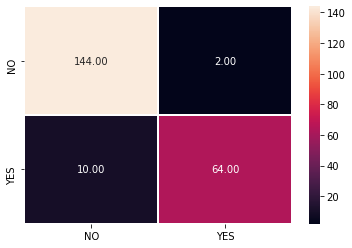

In [206]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    data=cm,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    xticklabels=["NO", "YES"],
    yticklabels=["NO", "YES"]
)

fig = plt.gcf()

plt.show()

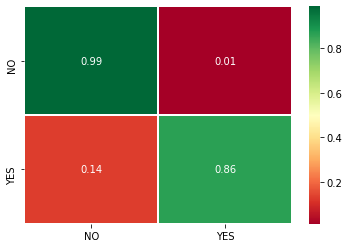

In [207]:
cm = confusion_matrix(y_test, y_pred, normalize="true")
sns.heatmap(
    data=cm,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=["NO", "YES"],
    yticklabels=["NO", "YES"]
)

fig = plt.gcf()

plt.show()

Ortaya çıkan grafik ve tablolarda gördüğümüz gibi, tahminleriz oldukça yüksekti. En son olarak, predictorumuz %93.6 doğruluk oranına ulaştı.

Projenin başında belirttiğimiz gibi, asıl amacımız, görüşme sürecinden önce veya sonra gerçek uzman doktorlara "yardımcı olabilecek" bir model geliştirmekti. Bu yüzden sınırlı bir süre içinde, yüz yüze görüşmeler yerine, doktorlar çevrimiçi bir test uygulayabilir ve çevrimiçi sonuçlara bakarak olumlu durumlar için yüz yüze görüşme talep edebilirler.


## Referanslar<a class="anchor" id="references"></a>

Veri Kaynakları:

Verinin Alındığı Yerler:

[1] Tabtah, F. (2017). Autism Spectrum Disorder Screening: Machine Learning Adaptation and DSM-5 Fulfillment. Proceedings of the 1st International Conference on Medical and Health Informatics 2017, pp.1-6. Taichung City, Taiwan, ACM.

[2] Thabtah, F. (2017). ASDTests. A mobile app for ASD screening. www.asdtests.com [accessed May 25th, 2020].

[3] Thabtah, F. (2017). Machine Learning in Autistic Spectrum Disorder Behavioural Research: A Review. Informatics for Health and Social Care Journal. December, 2017 (in press) 

Veri linkleri:
[Adolescent Data](https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++) - [Children](https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++) - [Adult](https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult)

Dataseti ve notebooku indirmek için: [Github](https://github.com/alibtasdemir/BBM469-CapstoneProject)

**Sorumluluk Reddi** <font color='grey'>Bu notebook Ali Baran Tasdemir ve Ahmet Kasim Toptas tarafından *BBM469 - Data Intensive Applications Laboratory* dersi için dönem projesi olarak hazırlanmıştır. Bu notebook sadece eğitici amaçlar için uygundur. Öğrencilerin yapmış olduğu çalışma olduğu için sağlanan içeriğin doğruluğu konusunda bir garanti yoktur. Herhangi bir telif hakkı ihlali olduğunu düşünürseniz, lütfen bize [bildirin](https://forms.gle/BNNRB2kR8ZHVEREq8).</font>

